
# EDA Project: Investigate a Dataset (Replace this with something more specific!)
# By Raghad Althunayyan

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will clean and analyze exploratory data for LinkedIn job postings based in Saudi (Jan 2020 to Mar 2021) to answer some of the questions.

> Note: Data was collected by data engineer Majed Al Hulayel.
>

> Question/need:

>1- What are the companies that may hire T5 Bootcamp graduates?

>2- what is the Level high required?

>3- What is the direction of the labor market?

>4- What is the peak month of job posting?.

In [2]:
# import statements for all of the packages that I plan to use.
import pandas as pd
import re
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

>  In this section of the report, I will load in the data, check for cleanliness, and then trim and clean our dataset for analysis. I will document my steps carefully and justify cleaning decisions.

<li><a href="#Gathering">Data Gathering</a></li>
<li><a href="#Assesment">Data Assesment</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>

<a id='Gathering'></a>
### Data Gathering

In [3]:
# Load data and print out a few lines.
#df= pd.read_csv("Data4.csv", error_bad_lines=False) to remove the warning lines put on_bad_lines  = 'skip'
df= pd.read_csv("linkedin jobs.csv",  error_bad_lines=False)
df.head(5)

b'Skipping line 146: expected 13 fields, saw 18\nSkipping line 327: expected 13 fields, saw 14\nSkipping line 337: expected 13 fields, saw 32\nSkipping line 369: expected 13 fields, saw 18\nSkipping line 370: expected 13 fields, saw 16\nSkipping line 426: expected 13 fields, saw 18\nSkipping line 465: expected 13 fields, saw 22\nSkipping line 524: expected 13 fields, saw 23\nSkipping line 544: expected 13 fields, saw 32\nSkipping line 635: expected 13 fields, saw 14\nSkipping line 647: expected 13 fields, saw 15\nSkipping line 654: expected 13 fields, saw 14\nSkipping line 664: expected 13 fields, saw 32\nSkipping line 690: expected 13 fields, saw 14\nSkipping line 739: expected 13 fields, saw 32\nSkipping line 743: expected 13 fields, saw 17\nSkipping line 749: expected 13 fields, saw 17\nSkipping line 788: expected 13 fields, saw 14\nSkipping line 812: expected 13 fields, saw 27\nSkipping line 828: expected 13 fields, saw 43\nSkipping line 923: expected 13 fields, saw 14\nSkipping li

b'Skipping line 67948: expected 13 fields, saw 20\nSkipping line 67952: expected 13 fields, saw 16\nSkipping line 67958: expected 13 fields, saw 21\nSkipping line 67970: expected 13 fields, saw 20\nSkipping line 67971: expected 13 fields, saw 16\nSkipping line 67977: expected 13 fields, saw 20\nSkipping line 67993: expected 13 fields, saw 44\nSkipping line 68015: expected 13 fields, saw 14\nSkipping line 68069: expected 13 fields, saw 50\nSkipping line 68111: expected 13 fields, saw 20\nSkipping line 68117: expected 13 fields, saw 132\nSkipping line 68137: expected 13 fields, saw 16\nSkipping line 68150: expected 13 fields, saw 16\nSkipping line 68164: expected 13 fields, saw 52\nSkipping line 68183: expected 13 fields, saw 16\nSkipping line 68204: expected 13 fields, saw 72\nSkipping line 68205: expected 13 fields, saw 42\nSkipping line 68207: expected 13 fields, saw 16\nSkipping line 68247: expected 13 fields, saw 16\nSkipping line 68250: expected 13 fields, saw 16\nSkipping line 682

/Users/raghadalthunayan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,position_id,Position,Company,Location,Date,Level,Job_Function,Industry,Description,Link,linkedin_id,company_linkedin_url,experience
0,51791,Head of Branding Governance Unit,Riyad Bank,"Riyadh, Saudi Arabia",2020-01-06 00:00:00,Mid-Senior level,"['Marketing', 'Management']",['Banking'],NaN,https://www.linkedin.com/jobs/view/1632901070/,1632901070,NaN,NaN
1,51792,Document Controller,"Confidential,Confidential","Riyadh, Saudi Arabia",2020-01-06 00:00:00,Associate,[''],['Government Administration'],Document Controller- (Saudi candidates only) ...,https://www.linkedin.com/jobs/view/1628497696/,1628497696,NaN,3
2,51793,Employee Engagement Specialist,PepsiCo,"Riyadh, Saudi Arabia",2020-01-06 00:00:00,Mid-Senior level,['Human Resources'],"['Consumer Goods', 'Food & Beverages']",Auto req ID: 199735BRJob DescriptionPepsiCo Sa...,https://www.linkedin.com/jobs/view/1666951758/,1666951758,NaN,1
3,51794,Strategic Workforce Analyst,Saudi Air Navigation Services,"Jeddah, Saudi Arabia",2020-01-06 00:00:00,Mid-Senior level,[''],['Aviation & Aerospace'],Role PurposeTo conduct workforce analysis to s...,https://www.linkedin.com/jobs/view/1671138260/,1671138260,NaN,NaN
4,51795,"Account Manager, GPS – Riyadh",EY,"Riyadh, Saudi Arabia",2020-01-06 00:00:00,Not Applicable,"['Sales', 'Business Development']","['Accounting', 'Financial Services']",In a business where are our people are our pro...,https://www.linkedin.com/jobs/view/1670725370/,1670725370,NaN,7


<a id='Assesment'></a>
### Data Assesment
- Perform operations to inspect data types
- Look for instances of missing or possibly errant data.



In [4]:
# inspect dataset shape.
df.shape

# inspect data type for each column.
df.dtypes

# inspect data set for missing values
df.isna().sum() 

position_id                 0
Position                 2444
Company                  2453
Location                 2479
Date                     2756
Level                   17208
Job_Function             2445
Industry                 2445
Description              5633
Link                     2640
linkedin_id              2760
company_linkedin_url    50534
experience              55346
dtype: int64

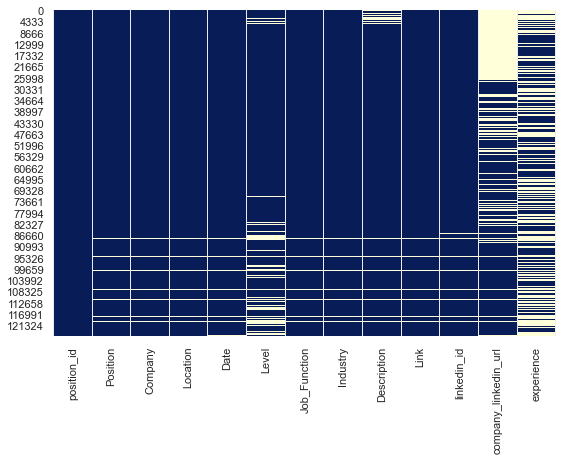

In [5]:
#Visulaization of missing values
fig, ax = plt.subplots(figsize=(9,6))
sb.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [16]:
# inspect each columns names.
df.columns

Index(['position_id', 'Position', 'Company', 'Location', 'Date', 'Level',
       'Job_Function', 'Industry', 'Description', 'Link', 'linkedin_id',
       'company_linkedin_url', 'experience'],
      dtype='object')

In [17]:
df.Position.value_counts()[df.Position.value_counts().values>10].index

Index(['Care Assistant', 'Store Associate', 'Accountant', 'Project Manager',
       'Graphic Designer', 'Business Development Manager', 'Sales Manager',
       'Sales Executive', 'Marketing Manager', 'Account Manager',
       ...
       'Python Developer', 'Sales Assistant', 'Property Consultant',
       'Business Development Coordinator', 'Materials Engineer',
       'Credit Manager', 'Sales Business Development',
       'Consultant - Geotechnical', 'Digital Marketing Executive',
       'Intern Bachelors Systems Eng - Saudi National'],
      dtype='object', length=1258)

In [18]:
# Explore column 'company' values for errant data.
df.Company.value_counts()[df.Company.value_counts().values>13].index

Index(['Allied Healthcare', 'Confidential', 'Parsons Corporation',
       'Landmark Arabia', 'Crossover for Work', 'Amazon', 'AFRY',
       'PwC Middle East', 'PepsiCo', 'AllRetailJobs.com',
       ...
       'SAP Middle East & North Africa', 'Chess Tag', 'Hala Fakher',
       'Awtad Anwa Trading Est. Titanium', 'Systems Networks Company',
       'Middle East Specialized Cables (MESC)',
       'Al Tahaluf Real Estate Company LLC شركة التحالف العقاري ذ.م.م',
       'Progress Personnel Limited. Executive Recruitment across KSA and the GCC',
       'Mag Areospace', 'Indman Management Consultants Private Limited'],
      dtype='object', length=1234)

In [19]:
# Explore location values that repeated more than 4 times for errant data.
df.Location.value_counts()[df.Location.value_counts().values>4].index

Index(['Riyadh, Riyadh, Saudi Arabia', 'Riyadh, Saudi Arabia', 'Saudi Arabia',
       'Jeddah, Makkah, Saudi Arabia', 'Jiddah, Makkah, Saudi Arabia',
       'Dammam, Eastern, Saudi Arabia', 'Al Khobar, Eastern, Saudi Arabia',
       'Makkah Region', 'Medina, Al Madinah, Saudi Arabia', 'Riyadh Region',
       ...
       '2021-08-06 00:00:00', '2021-07-20 00:00:00',
       'New Industrial City, Riyadh, Saudi Arabia',
       'Al Rayyan, Makkah, Saudi Arabia', '2021-11-01 00:00:00', 'Entry level',
       'Al Dawadmi, Riyadh, Saudi Arabia', '2021-10-20 00:00:00',
       '2021-10-09 00:00:00',
       'King Abdullah University of Science & Technology, Makkah, Saudi Arabia'],
      dtype='object', length=312)

In [20]:
# Explore location values that repeated less than 4 times for errant data.
df.Location.value_counts()[df.Location.value_counts().values<4].index

Index(['Al Waha, Riyadh, Saudi Arabia', '‘Afīf, Riyadh, Saudi Arabia',
       'Al Jazirah, Riyadh, Saudi Arabia', 'Al Majma, Najran, Saudi Arabia',
       'United States', 'Al Rahmaniyah, Riyadh, Saudi Arabia',
       '2021-09-03 00:00:00', 'Al Madinah, Northern Frontier, Saudi Arabia',
       '2021-11-09 00:00:00', 'Al Ulayah Al Gharbiyah, Riyadh, Saudi Arabia',
       ...
       'Saudi, Riyadh, Saudi Arabia',
       'King Fahd Military Medical Complex, Eastern, Saudi Arabia',
       '2021-10-17 00:00:00', 'Al Rayan, Riyadh, Saudi Arabia',
       'Al Hasah, Al Qasim, Saudi Arabia', 'Thadiq, Riyadh, Saudi Arabia',
       'Alfaysalyah, Najran, Saudi Arabia',
       'KhamÄ«s MushayÅ£, 'Asir, Saudi Arabia', 'Bahra, Makkah, Saudi Arabia',
       'Al Darb, Jizan, Saudi Arabia'],
      dtype='object', length=257)

In [21]:
# Explore column 'location' values that repeated 4 times for errant data
df.Location.value_counts()[df.Location.value_counts().values==4].index

Index(['‘Usfān, Makkah, Saudi Arabia', 'Sabya, Jizan, Saudi Arabia',
       '2021-09-26 00:00:00', 'Sak훮kah, Al Jawf, Saudi Arabia',
       'Al Majmaâ€˜ah, Riyadh, Saudi Arabia', '2021-10-18 00:00:00',
       'Hawtat Bani Tameem, Riyadh, Saudi Arabia',
       'Alhawiyah, Makkah, Saudi Arabia', '2021-08-28 00:00:00',
       'Al Nakheel, Riyadh, Saudi Arabia', 'Khurais, Eastern, Saudi Arabia',
       'Muhayal, 'Asir, Saudi Arabia', 'Salam, Al Qasim, Saudi Arabia',
       'Ḩuraymila, Saudi Arabia', 'Al Omrah Al Jaddeda, Makkah, Saudi Arabia',
       '2021-08-16 00:00:00', '2021-11-07 00:00:00',
       'Ain Shams, Makkah, Saudi Arabia',
       'Saudi Aramco, Eastern, Saudi Arabia', '99999', '2021-09-27 00:00:00',
       'Dammam 3Rd Industrial City, Eastern, Saudi Arabia',
       '2021-11-08 00:00:00', '2021-09-02 00:00:00',
       'Al Malga, Riyadh, Saudi Arabia', '2021-10-14 00:00:00',
       '2021-11-03 00:00:00'],
      dtype='object')

In [22]:
df.Date.value_counts().index

Index(['2020-01-28 00:00:00', '2020-01-21 00:00:00', '2020-01-13 00:00:00',
       '2020-02-07 00:00:00', '2020-01-06 00:00:00', '2020-02-29 00:00:00',
       '2020-02-22 00:00:00', '2020-02-15 00:00:00', '2020-12-11 00:00:00',
       '2020-03-21 00:00:00',
       ...
       '['Quality Assurance and Customer Service']', '2020-06-09 16:55:29',
       '2020-08-22 18:00:57', '2020-05-24 03:00:25', '2020-04-27 06:31:36',
       '['Information Technology, Consulting, and Engineering']',
       'Riyadh, Saudi Arabia', '2020-06-18 09:44:07', '2020-06-21 12:04:58',
       '2020-04-23 18:00:08'],
      dtype='object', length=1447)

In [23]:
# Explore column 'level' values for errant data.
df.Level.value_counts()[df.Level.value_counts().values>1].index

Index(['Entry level', 'Mid-Senior level', 'Associate', 'Not Applicable',
       'Director', 'Executive', 'Internship', '[]', '['Other']',
       '['Management and Manufacturing']', '['Information Technology']',
       '['Sales and Business Development']',
       '['Engineering and Information Technology']', '['Sales']',
       '['Project Management and Information Technology']',
       '['Accounting/Auditing and Finance']', '['Human Resources']',
       '['Customer Service and Information Technology']', '['Administrative']',
       '['Supply Chain']', '['Health Care Provider']',
       '['Business Development and Sales']', '['Engineering']',
       '['Research, Analyst, and Information Technology']',
       '['Quality Assurance']', '['Purchasing and Supply Chain']',
       '['Consulting, Information Technology, and Sales']',
       '['Design, Art/Creative, and Information Technology']',
       '['Finance and Sales']', '['Management', 'Manufacturing']',
       '['Marketing and Sales']',

In [24]:
# Explore column 'level' values for errant data.
df.Level.value_counts()[df.Level.value_counts().values==1]

['Engineering, Project Management, and Design']             1
['Purchasing', 'Supply Chain']                              1
['Finance, Accounting/Auditing, and Other']                 1
['Project Management, Marketing, and Other']                1
['Information Technology and Training']                     1
                                                           ..
['Advertising, Marketing, and Product Management']          1
['Accounting/Auditing, Finance, and Administrative']        1
['Administrative, Business Development, and Management']    1
['Analyst, Information Technology, and Administrative']     1
['Manufacturing and Research']                              1
Name: Level, Length: 130, dtype: int64

In [25]:
df.Job_Function.value_counts()[df.Job_Function.value_counts().values>5].index

Index(['[]', '['Management', 'Manufacturing']', '['Other']',
       '['Sales', 'Business Development']', '['Information Technology']',
       '['Engineering', 'Information Technology']', '['Health Care Provider']',
       '['Human Resources']', '['Management and Manufacturing']', '['']',
       ...
       '['Business Development', 'Management', 'Sales']',
       '['Purchasing, Supply Chain, and Engineering']',
       '['Consulting, Engineering, and Project Management']',
       '['Business Development, Customer Service, and Management']',
       '['Other', 'Education']',
       '['Analyst', 'Consulting', 'Strategy/Planning']',
       '['Customer Service', 'Training', 'Human Resources']',
       '['Customer Service and Sales']',
       '['Administrative', 'Customer Service', 'Sales']',
       '['Engineering, Information Technology, and Product Management']'],
      dtype='object', length=752)

In [26]:
df.Industry.value_counts()[df.Industry.value_counts().values>20].index

Index(['[]', '['Information Technology and Services']',
       '['Nonprofit Organization Management, Staffing and Recruiting, and Hospital & Health Care']',
       '['Hospital & Health Care']', '['Retail']', '['Hospitality']',
       '['Electrical/Electronic Manufacturing']',
       '['Marketing and Advertising']', '['']', '['Construction']',
       ...
       '['Financial Services', 'Investment Banking', 'Investment Management']',
       '['Farming']',
       '['Defense & Space', 'Information Technology and Services', 'Government Relations']',
       '['Internet', 'Food & Beverages', 'Information Technology and Services']',
       '['Electrical/Electronic Manufacturing, Information Technology and Services, and Machinery']',
       '['Apparel & Fashion', 'Luxury Goods & Jewelry', 'Retail']',
       '['Construction', 'Retail', 'Hospital & Health Care']',
       '['Insurance', 'Hospital & Health Care']',
       '['Marketing and Advertising', 'Information Technology and Services', 'Manage

In [27]:
df.experience.value_counts()

5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [28]:
df.columns

Index(['position_id', 'Position', 'Company', 'Location', 'Date', 'Level',
       'Job_Function', 'Industry', 'Description', 'Link', 'linkedin_id',
       'company_linkedin_url', 'experience'],
      dtype='object')

<a id='Assesment Report'></a>
### Final Assesment Report

- Columns 'Unnamed: 0', and 'position_id' has no valuable data(less important).

- Columns names have a capital letters.

- Columns 'Position', 'Job_Function' has similar content.

- Column 'Company' contain location data.

- Column 'Location' contain Date data

- Column 'Date' is object type. (the time period may be short to get a good insights)

- Column 'Level' has a lot of data differnt from level class.

- Column experience is object type and has errant data.

- All columns have nan values.



## Data Cleaning

befor cleaning copying DataFrames in pandas is done using .copy method

In [29]:
df_clean = df.copy()

### Columns 'Unnamed: 0', and 'position_id' has no valuable data(less important).

In [30]:

# drop columns that not helpful for my analysis
df_clean.drop(["position_id", "Description", "Link",
               "linkedin_id", "company_linkedin_url"], axis=1, errors="ignore" , inplace = True)

In [32]:
df_clean.head(1)

,Position,Company,Location,Date,Level,Job_Function,Industry,experience
0,Head of Branding Governance Unit,Riyad Bank,"Riyadh, Saudi Arabia",2020-01-06 00:00:00,Mid-Senior level,"['Marketing', 'Management']",['Banking'],NaN


### Columns names have a capital letters.

In [33]:
df_clean.rename(columns=lambda x : x.lower(),inplace=True)

In [34]:
df_clean.head(1)

,position,company,location,date,level,job_function,industry,experience
0,Head of Branding Governance Unit,Riyad Bank,"Riyadh, Saudi Arabia",2020-01-06 00:00:00,Mid-Senior level,"['Marketing', 'Management']",['Banking'],NaN


## Columns 'Position', 'Job_Function' has similar content.


In [35]:
# creating a new column named 'department'
df_clean['department'] = ''
# merging the two columns 'position' and 'job_function' into a new column 'position_job_function'.
df_clean['position_job_function'] = df_clean['position']+' '+df_clean['job_function']
# exploring the dataframe.
df_clean.head(5)

,position,company,location,date,level,job_function,industry,experience,department,position_job_function
0,Head of Branding Governance Unit,Riyad Bank,"Riyadh, Saudi Arabia",2020-01-06 00:00:00,Mid-Senior level,"['Marketing', 'Management']",['Banking'],NaN,,Head of Branding Governance Unit ['Marketing'...
1,Document Controller,"Confidential,Confidential","Riyadh, Saudi Arabia",2020-01-06 00:00:00,Associate,[''],['Government Administration'],3,,Document Controller ['']
2,Employee Engagement Specialist,PepsiCo,"Riyadh, Saudi Arabia",2020-01-06 00:00:00,Mid-Senior level,['Human Resources'],"['Consumer Goods', 'Food & Beverages']",1,,Employee Engagement Specialist ['Human Resourc...
3,Strategic Workforce Analyst,Saudi Air Navigation Services,"Jeddah, Saudi Arabia",2020-01-06 00:00:00,Mid-Senior level,[''],['Aviation & Aerospace'],NaN,,Strategic Workforce Analyst ['']
4,"Account Manager, GPS – Riyadh",EY,"Riyadh, Saudi Arabia",2020-01-06 00:00:00,Not Applicable,"['Sales', 'Business Development']","['Accounting', 'Financial Services']",7,,"Account Manager, GPS – Riyadh ['Sales', 'Busin..."


In [36]:
df_clean.position_job_function.value_counts()[df_clean.position_job_function.value_counts().values>50].index

Index(['Care Assistant ['Other']',
       'Store Associate ['Sales', 'Business Development']',
       'Store Associate ['']', 'Accountant ['Accounting/Auditing', 'Finance']',
       'Project Manager ['Project Management', 'Information Technology']',
       'Accountant []',
       'Graphic Designer ['Design', 'Art/Creative', 'Information Technology']',
       'Graphic Designer []',
       'Sales Manager ['Sales', 'Business Development']', 'Salesman ['Sales']',
       'Business Development Manager ['Sales', 'Business Development']',
       'Sales Executive ['Sales', 'Business Development']',
       'Account Manager ['Sales', 'Business Development']',
       'Marketing Manager ['Marketing', 'Sales']',
       'Senior Accountant ['Accounting/Auditing', 'Finance']',
       'Document Controller ['Administrative']',
       'Store Associate ['Sales and Business Development']',
       'Human Resources Manager ['Human Resources']',
       'Marketing Specialist ['Marketing', 'Sales']',
       'Sal

In [37]:
df_clean.position_job_function.isnull().sum()

2445

In [38]:
df_clean['position_job_function'].fillna(" d ")

0         Head of Branding Governance Unit  ['Marketing'...
1                                  Document Controller ['']
2         Employee Engagement Specialist ['Human Resourc...
3                          Strategic Workforce Analyst ['']
4         Account Manager, GPS – Riyadh ['Sales', 'Busin...
                                ...                        
125642                                        Accountant []
125643          Enterprise Resources Planning Specialist []
125644    HR Development Specialist ( Tamheer ) أخصائي ت...
125645    Customer Experience Associate ['Customer Servi...
125646                     Program Officer, Saudi Arabia []
Name: position_job_function, Length: 125647, dtype: object

In [39]:
# using regex to extract the multiple departments.
for index, row in df_clean.iterrows():  
    string = str(row['position_job_function'])
    pattern = re.search('Care|Medical|Nurse|Health',string, re.I)
    
    if pattern:
        df_clean.loc[index,'department'] = 'health care'
       
    
    else:
        pattern = re.search('Account|Finance|Cashier|محاسب',string, re.I)
        if pattern:
            df_clean.loc[index,'department'] = 'finance'
      
        else:
            pattern = re.search('Business|Admin|Secretary',string, re.I)
            if pattern:
                df_clean.loc[index,'department'] = 'adminstration'
        
            else:
                pattern = re.search('Sales|Marketing|Market',string, re.I)
                if pattern:
                    df_clean.loc[index,'department'] = 'sales'
        
                else:
                    pattern = re.search('Human|Human Resources|Recruitment',string, re.I)
                    if pattern:
                        df_clean.loc[index,'department'] = 'human resources' 
      
                    else:
                        pattern = re.search('Logistics|Store|Supply|Warehouse|Purchasing|Goods|Distribution',string, re.I)
                        if pattern:
                            df_clean.loc[index,'department'] = 'logistics'
              
                        else:
                            pattern = re.search('Training|quality|Consulting|Warehouse|Purchasing|Goods|Distribution',string, re.I)
                            if pattern:
                                df_clean.loc[index,'department'] = 'training and quality' 
                                
                            else:
                                pattern = re.search('Public Relations|Social|relations',string, re.I)
                                if pattern:
                                    df_clean.loc[index,'department'] = 'public relations' 
       
                                else:
                                    pattern = re.search('Planning|Product|Manufactur|Design|Specialist',string, re.I)
                                    if pattern:
                                        df_clean.loc[index,'department'] = 'engineering'
              
                                    else:
                                        pattern = re.search('Project|Engineer|Architect|Software|Technology',string, re.I)
                                        if pattern:
                                            df_clean.loc[index,'department'] = 'Information Technology'
                                        else:
                                              df_clean.loc[index,'department'] = 'other'        
    
    

In [40]:
df_clean.department.value_counts().index

Index(['Information Technology', 'engineering', 'adminstration', 'other',
       'finance', 'sales', 'health care', 'logistics', 'training and quality',
       'human resources', 'public relations'],
      dtype='object')

In [41]:
#drop the two columns 'position' ,  'job_function', 'position_job_function'.
df_clean.drop(columns =['position' ,  'job_function', 'position_job_function' ] , inplace = True)

### Column 'Company' contain location data.

In [42]:
#using regex create location dict with shifted data. 
loc_dict = {}
for index, row in df_clean.iterrows():  
    string = str(row['company'])
    pattern = re.search('(, Saudi Arabia)',string, re.I)
    if pattern:
        loc_dict[index] = pattern.string.split(',')[-2].strip()

In [43]:
#iterate location dict to put the data in the location column. and clear the crossponding cell in company column.
for k,v in loc_dict.items():
    df_clean.iloc[int(k),1]=v
    df_clean.iloc[int(k),0]=""

In [44]:
df_clean['company'].value_counts()

Allied Healthcare                  2748
Confidential                       2610
Parsons Corporation                2546
Landmark Arabia                    1925
Crossover for Work                 1813
                                   ... 
United Support Company                1
Agencia Pública de Empleo SENA        1
Crawford & Company                    1
Scadea                                1
Charles Hunter Associates             1
Name: company, Length: 16133, dtype: int64

### Column 'Location' contain Date data

In [45]:
#using regex create date dict with shifted data. and correct the location values.
date_dict = {}
loc2_dict = {}
for index, row in df_clean.iterrows():  
    string = str(row['location'])
    pattern = re.search('(\d{4})-(\d{2})-(\d{2}) (\d{2}):(\d{2}):(\d{2})',string, re.I)
    if pattern:
        date_dict[index] = pattern.string
    else:
        try:
            loc2_dict[index] = string.split(',')[-2].strip()
        except:
            loc2_dict[index] = string.split(',')[-1].strip()

In [46]:
#iterate location dict to put the data in the location column. and clear the crossponding cell in company column.
for k,v in loc2_dict.items():
    df_clean.iloc[int(k),1]=v

#iterate date dict to put the data in the date column. and clear the crossponding cell in location column.
for k,v in date_dict.items():
    df_clean.iloc[int(k),2]=v
    df_clean.iloc[int(k),1]=""

In [47]:
#test the location valuesafter correction
df_clean.location.value_counts()[df_clean.location.value_counts().values>4].index

Index(['Riyadh', 'Makkah', 'Eastern', 'Saudi Arabia', 'Al Madinah',
       'Makkah Region', 'nan', 'Riyadh Region', 'Eastern Region', 'Tabuk',
       'Jizan', 'Jeddah', ''Asir', 'Al Qasim', 'Ha'il', 'Al Jubayl', 'Al Jawf',
       'Dammam', 'Khobar', 'Jazan Region', '', 'Dhahran', 'Tabuk Region',
       'Najran', 'Madinah', 'Northern Borders Region', 'Qaseem',
       'Northern Frontier', 'Al-Qassim Region', 'Asir Region',
       'Madinah Region', 'Al Bahah', 'Al Mubarraz', 'Yanbu', 'Banban',
       'Abqaiq', 'As Sulayyil', 'Jubail', '‘Unayzah', 'Ḩafar al Baţin',
       'Najran Region', 'Ḑubā', 'Al-Bahah Region', 'United Arab Emirates',
       'Rabigh', 'Hail Region', 'Tabouk', 'Ahsa', 'Burgundy-Franche-Comte',
       'Ar Ramādīyāt', 'Ra’s al Khafji', 'Taif', 'Al-Jawf Region',
       'Ad Dawādimī', 'India', 'Baha', 'King Khalid Military City', 'Wales',
       'Hail', 'Associate', 'As Sulimaniyah', 'Dubai', 'Entry level'],
      dtype='object')

In [48]:
df_clean

,company,location,date,level,industry,experience,department
0,Riyad Bank,Riyadh,2020-01-06 00:00:00,Mid-Senior level,['Banking'],NaN,sales
1,"Confidential,Confidential",Riyadh,2020-01-06 00:00:00,Associate,['Government Administration'],3,other
2,PepsiCo,Riyadh,2020-01-06 00:00:00,Mid-Senior level,"['Consumer Goods', 'Food & Beverages']",1,human resources
3,Saudi Air Navigation Services,Jeddah,2020-01-06 00:00:00,Mid-Senior level,['Aviation & Aerospace'],NaN,other
4,EY,Riyadh,2020-01-06 00:00:00,Not Applicable,"['Accounting', 'Financial Services']",7,finance
...,...,...,...,...,...,...,...
125642,Unkown,Riyadh,2021-11-12 00:00:00,NaN,[],NaN,finance
125643,Xbress.com,Riyadh,2021-11-12 00:00:00,NaN,[],3,engineering
125644,SFDA - هيئة الغذاء والدواء,Riyadh,2021-11-11 00:00:00,Entry level,['Government Administration'],NaN,human resources
125645,Calo Inc.,Eastern,2021-09-19 00:00:00,Entry level,"['Restaurants, Food and Beverage Services, and...",1,Information Technology


### Column 'Date' is object type. (the time period may be short to get a good insights)

In [49]:
df_clean['date']= pd.to_datetime(df_clean['date'] , errors='coerce', format='%Y-%m-%d')

In [50]:
df_clean.date

0        2020-01-06
1        2020-01-06
2        2020-01-06
3        2020-01-06
4        2020-01-06
            ...    
125642   2021-11-12
125643   2021-11-12
125644   2021-11-11
125645   2021-09-19
125646   2021-11-11
Name: date, Length: 125647, dtype: datetime64[ns]

In [52]:
df_clean['month']=df_clean['date'].dt.month_name()
df_clean

,company,location,date,level,industry,experience,department,month
0,Riyad Bank,Riyadh,2020-01-06,Mid-Senior level,['Banking'],NaN,sales,January
1,"Confidential,Confidential",Riyadh,2020-01-06,Associate,['Government Administration'],3,other,January
2,PepsiCo,Riyadh,2020-01-06,Mid-Senior level,"['Consumer Goods', 'Food & Beverages']",1,human resources,January
3,Saudi Air Navigation Services,Jeddah,2020-01-06,Mid-Senior level,['Aviation & Aerospace'],NaN,other,January
4,EY,Riyadh,2020-01-06,Not Applicable,"['Accounting', 'Financial Services']",7,finance,January
...,...,...,...,...,...,...,...,...
125642,Unkown,Riyadh,2021-11-12,NaN,[],NaN,finance,November
125643,Xbress.com,Riyadh,2021-11-12,NaN,[],3,engineering,November
125644,SFDA - هيئة الغذاء والدواء,Riyadh,2021-11-11,Entry level,['Government Administration'],NaN,human resources,November
125645,Calo Inc.,Eastern,2021-09-19,Entry level,"['Restaurants, Food and Beverage Services, and...",1,Information Technology,September


### Column experience is object type and has errant data.

In [53]:
df_clean['experience']= df_clean['experience'].str.extract('(\d+)')
df_clean= df_clean.drop(df_clean[df_clean['experience']=='032021'].index)
df_clean['experience'].replace('01','1', inplace=True)

In [54]:
df_clean.experience.value_counts()

5     12431
3     11190
2     10328
10     7355
1      5597
4      4002
8      3668
15     3507
7      3025
6      2185
12     1594
0      1032
20     1016
9       263
14      177
18      134
30      110
24       86
13       79
25       76
21       74
11       57
16       46
22       42
35       39
17       28
26       19
23       17
19        8
28        5
27        5
31        4
32        3
29        1
Name: experience, dtype: int64

In [55]:
df_clean['experience']= df_clean['experience'].fillna(0)
df_clean['experience']= df_clean['experience'].astype(int)
df_clean.experience.value_counts()

0     58475
5     12431
3     11190
2     10328
10     7355
1      5597
4      4002
8      3668
15     3507
7      3025
6      2185
12     1594
20     1016
9       263
14      177
18      134
30      110
24       86
13       79
25       76
21       74
11       57
16       46
22       42
35       39
17       28
26       19
23       17
19        8
27        5
28        5
31        4
32        3
29        1
Name: experience, dtype: int64

### Column 'Level' has a lot of data differnt from level class.

In [56]:
df_clean.groupby('level').experience.mean()

level
\n\n\n        Experience \n      \n\n        Show more\n\n        \n\n\n        Show less\n\n        \n\n\n    0.000000
2021-09-06 00:00:00                                                                                            0.000000
Associate                                                                                                      3.395087
Director                                                                                                       5.624619
Entry level                                                                                                    1.940081
                                                                                                                 ...   
['Supply Chain, Distribution, and Administrative']                                                             0.000000
['Training and Other']                                                                                         0.000000
['Utilities']                     

In [57]:
#create level list
level_list = [ 'Internship', 'Entry level', 'Mid-Senior level', 'Associate', 'Director', 'Executive']
for index, row in df_clean.iterrows():
    if row['level'] not in level_list:
        if df_clean.loc[index,'experience']<1:
            df_clean.loc[index,'level'] = 'Internship'
        elif df_clean.loc[index,'experience']<=2:
            df_clean.loc[index,'level'] = 'Entry level'
        if df_clean.loc[index,'experience']<=3:
            df_clean.loc[index,'level'] = 'Associate'
        if df_clean.loc[index,'experience']<=4:
            df_clean.loc[index,'level'] = 'Executive'
        if df_clean.loc[index,'experience']<=5:
            df_clean.loc[index,'level'] = 'Mid-Senior level'
        if df_clean.loc[index,'experience']>5:
            df_clean.loc[index,'level'] = 'Director'           
    else:
        df_clean.loc[index,'level'] = row['level']

In [58]:
df_clean.level.isnull().sum()

0

### All columns have nan values.

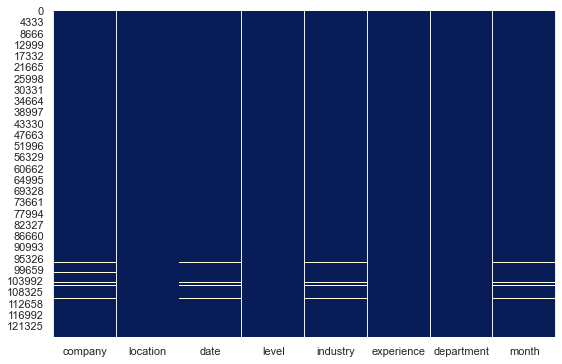

In [60]:
fig, ax = plt.subplots(figsize=(9,6))
sb.heatmap(df_clean.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [61]:
#drob null values by rows
df_clean.dropna(subset=['company'],inplace=True) 

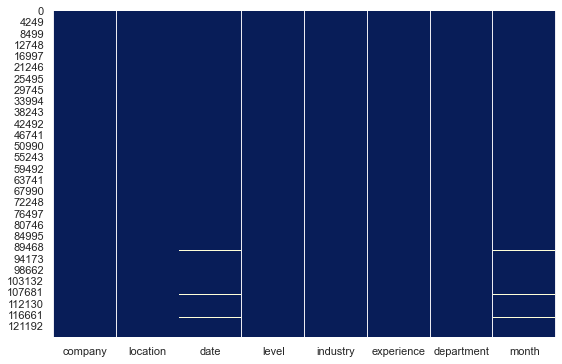

In [62]:
fig, ax = plt.subplots(figsize=(9,6))
sb.heatmap(df_clean.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [63]:
df_clean.head(40)

,company,location,date,level,industry,experience,department,month
0,Riyad Bank,Riyadh,2020-01-06,Mid-Senior level,['Banking'],0,sales,January
1,"Confidential,Confidential",Riyadh,2020-01-06,Associate,['Government Administration'],3,other,January
2,PepsiCo,Riyadh,2020-01-06,Mid-Senior level,"['Consumer Goods', 'Food & Beverages']",1,human resources,January
3,Saudi Air Navigation Services,Jeddah,2020-01-06,Mid-Senior level,['Aviation & Aerospace'],0,other,January
4,EY,Riyadh,2020-01-06,Director,"['Accounting', 'Financial Services']",7,finance,January
5,Geidea Solutions,Riyadh,2020-01-06,Director,"['Information Technology and Services', 'Finan...",0,sales,January
6,Philips,Riyadh,2020-01-06,Mid-Senior level,[''],0,other,January
7,تطوير تقنيات التعليم | Tatweer Educational Tec...,Riyadh,2020-01-06,Mid-Senior level,['Information Technology and Services'],5,adminstration,January
8,WSP in the Middle East,Riyadh,2020-01-06,Associate,['Construction'],5,finance,January
9,SC Johnson,Jeddah,2020-01-06,Mid-Senior level,[''],0,sales,January


### Column Industry has errant data.

In [64]:
# using regex to extract the multiple departments.
for index, row in df_clean.iterrows():  
    string = str(row['industry'])
    pattern = re.search('Nonprofit|Non-profit',string, re.I)
    
    if pattern:
        df_clean.loc[index,'industry'] = 'Nonprofit Organization'
    else:
        pattern = re.search('Internet|Computer Software|IT Services|Computer Games|Network|Computer',string, re.I)
        if pattern:
            df_clean.loc[index,'industry'] = 'IT Services'
        else:
            pattern = re.search('Retail|quality|Goods|Packaging|Commercial|Logistics | Aviation | Aerospace |Market|Advertising|Airlines',string, re.I)
            if pattern:
                df_clean.loc[index,'industry'] = 'Retail'

            else:
                pattern = re.search('Utilities|Hospitality|Restaurants|Fitness|Travel|Luxury|Government|Education|Transportation|Communications|Environmental',string, re.I)
                if pattern:
                    df_clean.loc[index,'industry'] = 'Utilities'
        
                else:
                    pattern = re.search('manufacturing|Chemicals|Automotive|Warehouse|Purchasing|Goods|Distribution|Construction|Oil & Energy|Construction|Civil Engineering|Electrical|Mechanical|Planning|Nanotechnology|Production|Biotechnology',string, re.I)
                    if pattern:
                        df_clean.loc[index,'industry'] = 'Industrial'
                    else:
                        pattern = re.search('Financial Services|Insurance|Banking|Investment',string, re.I)
                        if pattern:
                            df_clean.loc[index,'industry'] = 'Finance'

                        else:
                            pattern = re.search('Medical|Pharmaceuticals',string, re.I)
                            if pattern:
                                df_clean.loc[index,'industry'] = 'Medical' 

                            else:
                                df_clean.loc[index,'industry'] = 'other'

In [65]:
df_clean.industry.value_counts()

other                     40091
Industrial                21756
Retail                    18251
IT Services               15173
Utilities                 14514
Finance                    7259
Nonprofit Organization     3801
Medical                    2348
Name: industry, dtype: int64

In [66]:
df_clean.head()

,company,location,date,level,industry,experience,department,month
0,Riyad Bank,Riyadh,2020-01-06,Mid-Senior level,Finance,0,sales,January
1,"Confidential,Confidential",Riyadh,2020-01-06,Associate,Utilities,3,other,January
2,PepsiCo,Riyadh,2020-01-06,Mid-Senior level,Retail,1,human resources,January
3,Saudi Air Navigation Services,Jeddah,2020-01-06,Mid-Senior level,other,0,other,January
4,EY,Riyadh,2020-01-06,Director,Finance,7,finance,January


 # Store Data

In [67]:
if not os.path.isfile('dataset_cleaned.csv'):
    df_clean.to_csv('dataset_cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

>  Now I trimmed and cleaned data, I am ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.



In [68]:


#load the cleaned dataset
explor = pd.read_csv('dataset_cleaned.csv')
explor.head(3)


,company,location,date,level,industry,experience,department,month
0,Riyad Bank,Riyadh,2020-01-06 00:00:00,Mid-Senior level,Finance,0,sales,January
1,"Confidential,Confidential",Riyadh,2020-01-06 00:00:00,Associate,Utilities,3,other,January
2,PepsiCo,Riyadh,2020-01-06 00:00:00,Mid-Senior level,Retail,1,human resources,January


## Univariate Exploration
#### In this section, we are going to investigate distributions of individual variables. and checking for unusual points or outliers.

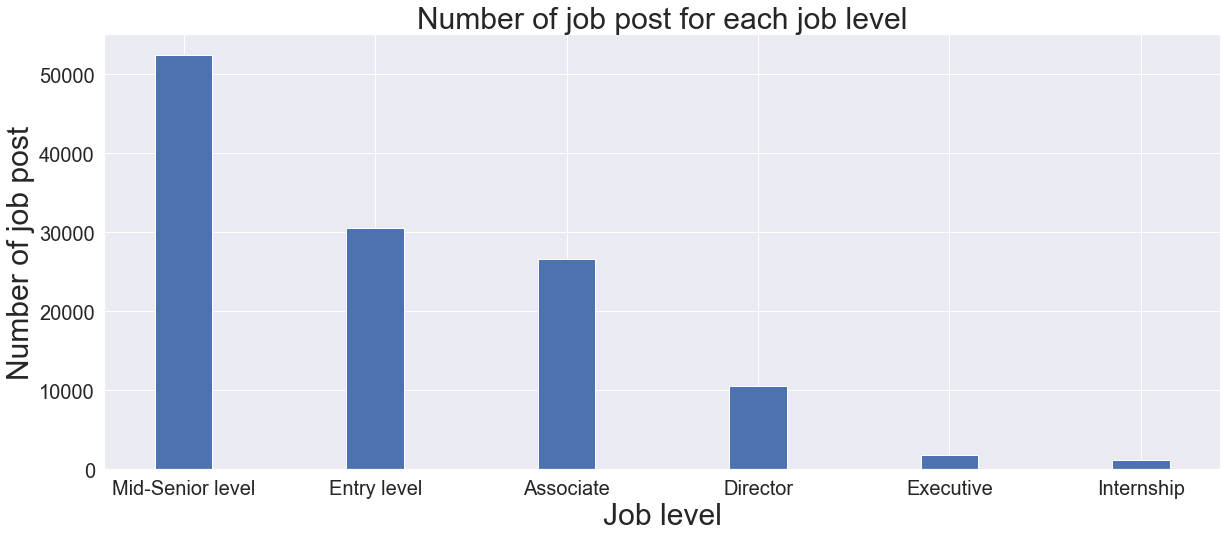

In [115]:
plt.figure(figsize = [20,8])
base_color =sb.color_palette()[0]
data = explor.level.value_counts()
plt.bar(x = data.index,height= data.values ,color=  base_color, width = .3)
plt.tick_params(labelsize = 20)
plt.xlabel('Job level', fontsize=30)
plt.ylabel('Number of job post', fontsize=30, rotation = 'vertical')
plt.title('Number of job post for each job level', fontsize = 30);

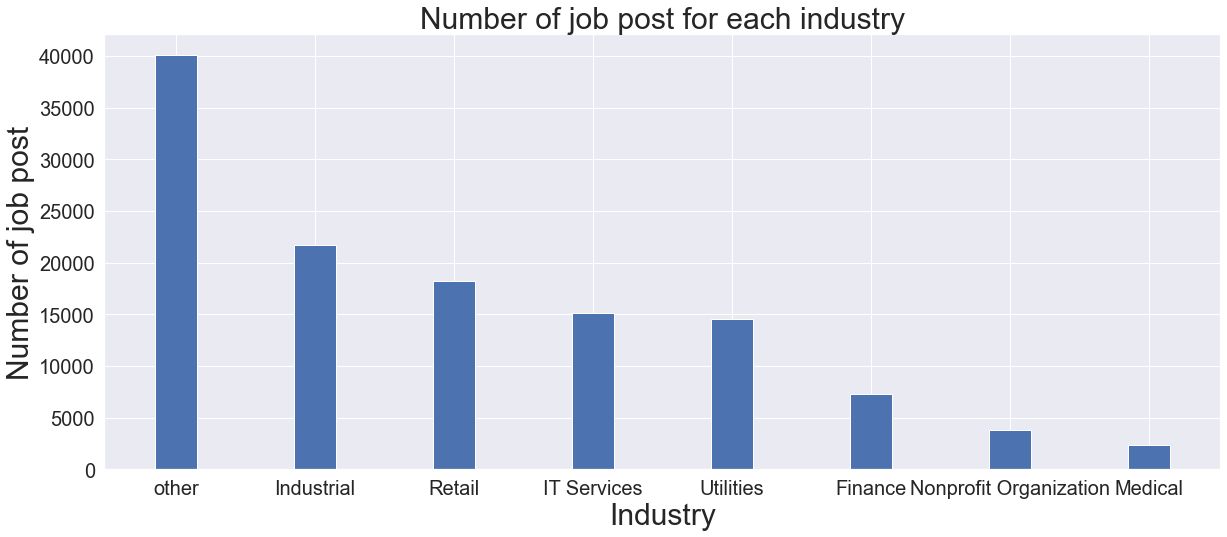

In [70]:
plt.figure(figsize = [20,8])
base_color =sb.color_palette()[0]
data = explor.industry.value_counts()
plt.bar(x = data.index,height= data.values ,color=  base_color, width = .3)
plt.tick_params(labelsize = 20)
plt.xlabel('Industry', fontsize=30)
plt.ylabel('Number of job post', fontsize=30, rotation = 'vertical')
plt.title('Number of job post for each industry', fontsize = 30);

## Research Question 1 (What is the direction of the labor market?)


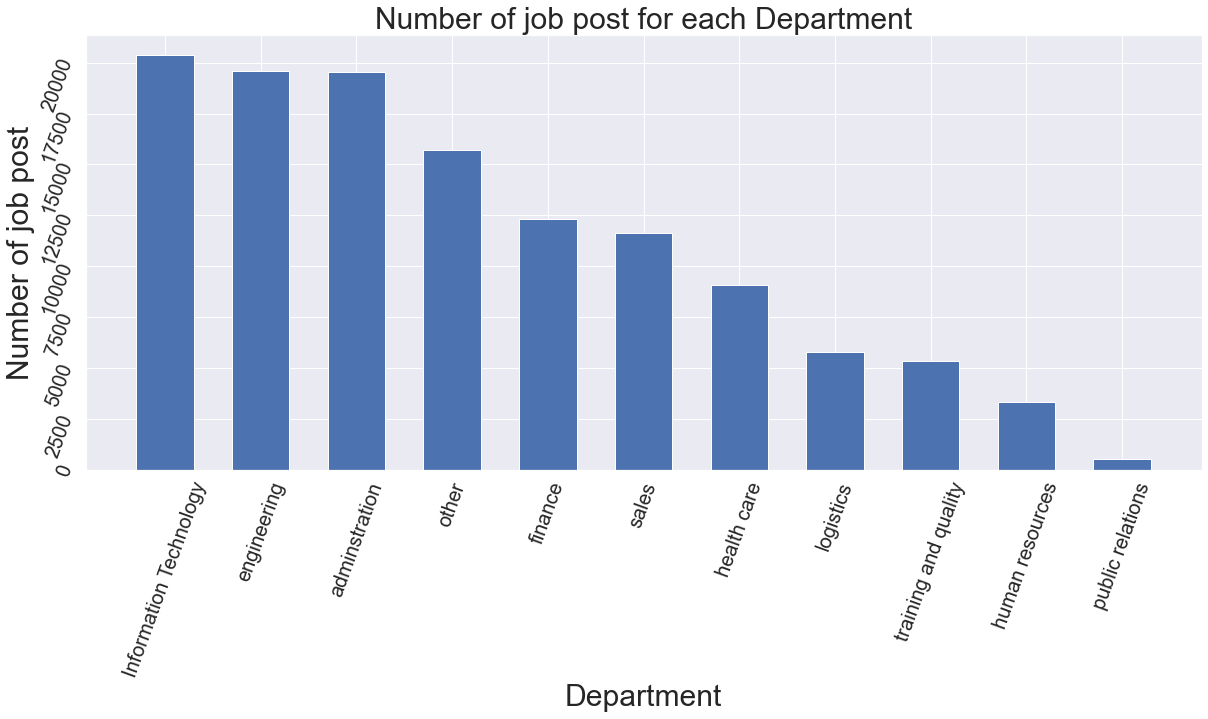

In [137]:
plt.figure(figsize = [20,8])
base_color =sb.color_palette()[0]
data = explor.department.value_counts()
plt.bar(x = data.index,height= data.values ,color=  base_color, width = .6)
plt.tick_params(labelsize = 20,rotation=70)
plt.xlabel('Department', fontsize=30)
plt.ylabel('Number of job post', fontsize=30, rotation = 'vertical')
plt.title('Number of job post for each Department', fontsize = 30);

## Research Question 2 (What is the peak month of job posting?.)

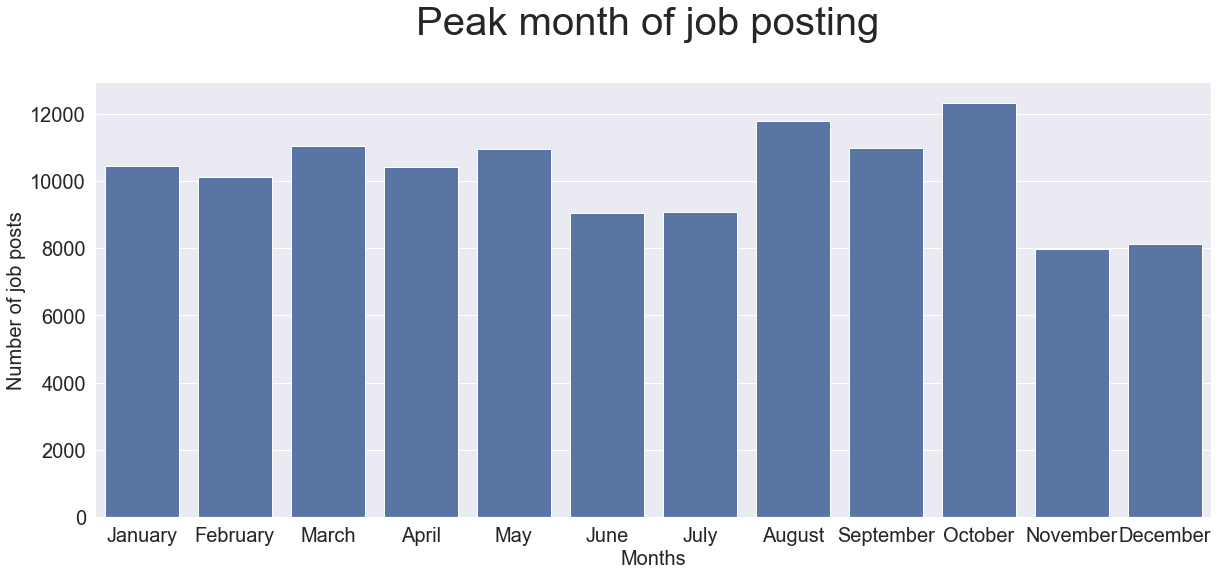

In [142]:
plt.figure(figsize = [20,8])
base_color =sb.color_palette()[0]
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
sb.countplot(data = explor, x = 'month', color=  base_color, order = order)
plt.tick_params(labelsize = 20)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Number of job posts', fontsize=20, rotation = 'vertical')
plt.title('Peak month of job posting \n' , fontsize = 40);

In [143]:
top10_location= list(explor.location.value_counts()[:10].index)

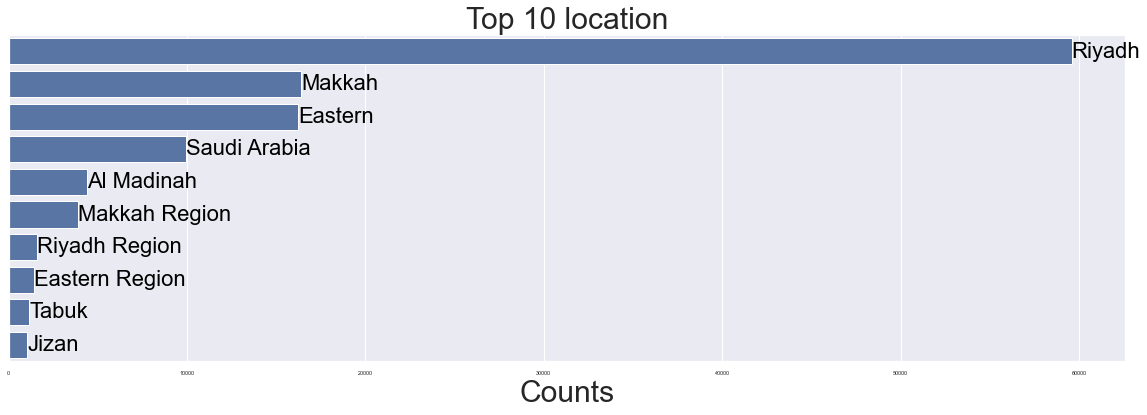

In [147]:
plt.figure(figsize = [20,6])
base_color =sb.color_palette()[0]
sb.countplot(data = explor[explor.location.isin(top10_location)], y = 'location', color=  base_color, order = top10_location)

job_counts = explor.location.value_counts()
for i in range (10):           #loop to write text on each bar
    count = job_counts[i]
    text = '{}'.format(job_counts.index[i])
    plt.text(count, i, text, va = 'center',fontsize=22, color = 'black')
    
    
plt.tick_params(axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('Counts', fontsize=30)
plt.ylabel('', fontsize=30)
plt.yticks([])
plt.title('Top 10 location', fontsize = 30);

In [148]:
top10_company= list(explor.company.value_counts()[:10].index)
top10_company

['Allied Healthcare',
 'Confidential',
 'Parsons Corporation',
 'Landmark Arabia',
 'Crossover for Work',
 'Amazon',
 'AFRY',
 'PwC Middle East',
 'PepsiCo',
 'AllRetailJobs.com']

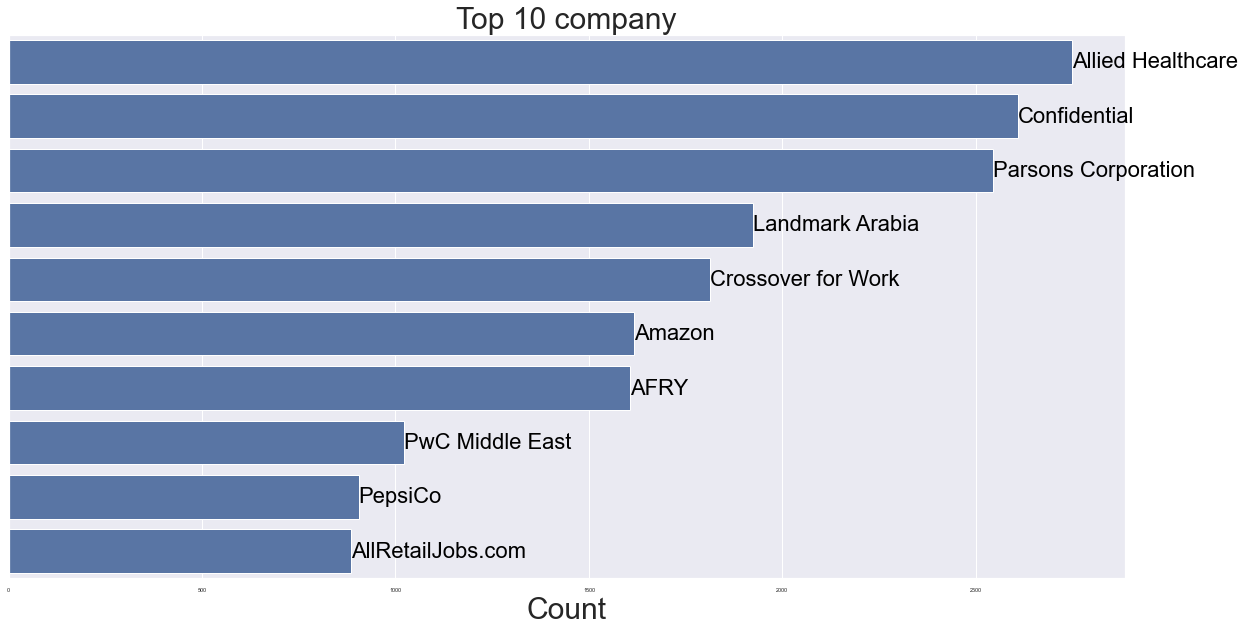

In [151]:
plt.figure(figsize = [20,10])
base_color =sb.color_palette()[0]
sb.countplot(data = explor[explor.company.isin(top10_company)], y = 'company', color=  base_color, order = top10_company)

job_counts = explor.company.value_counts()
for i in range (10):           #loop to write text on each bar
    count = job_counts[i]
    text = '{}'.format(job_counts.index[i])
    plt.text(count, i, text, va = 'center',fontsize=22, color = 'black')
    
    
plt.tick_params(axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('Count', fontsize=30)
plt.ylabel('', fontsize=30)
plt.yticks([])
plt.title('Top 10 company', fontsize = 30);

In [152]:
explor

,company,location,date,level,industry,experience,department,month
0,Riyad Bank,Riyadh,2020-01-06,Mid-Senior level,Finance,0,sales,January
1,"Confidential,Confidential",Riyadh,2020-01-06,Associate,Utilities,3,other,January
2,PepsiCo,Riyadh,2020-01-06,Mid-Senior level,Retail,1,human resources,January
3,Saudi Air Navigation Services,Jeddah,2020-01-06,Mid-Senior level,other,0,other,January
4,EY,Riyadh,2020-01-06,Director,Finance,7,finance,January
...,...,...,...,...,...,...,...,...
123188,Unkown,Riyadh,2021-11-12,Mid-Senior level,other,0,finance,November
123189,Xbress.com,Riyadh,2021-11-12,Mid-Senior level,other,3,engineering,November
123190,SFDA - هيئة الغذاء والدواء,Riyadh,2021-11-11,Entry level,Utilities,0,human resources,November
123191,Calo Inc.,Eastern,2021-09-19,Entry level,Utilities,1,Information Technology,September


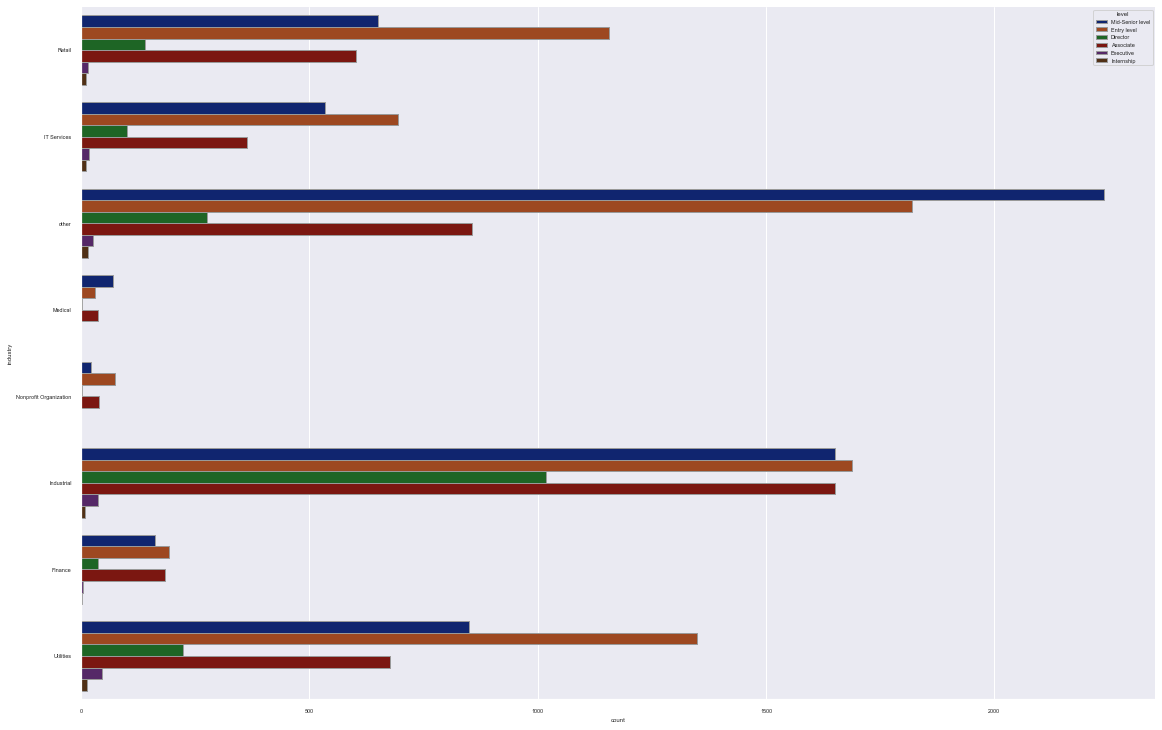

In [159]:
sb.catplot(y="industry", hue="level", kind="count",
            palette="dark", edgecolor=".6",
            data=engineering,height=10,aspect=1.6,legend_out=False)
sb.set(font_scale = .5)


In [160]:
mask = explor[explor.department=='Information Technology']

## Research Question 3 (What are the companies that may hire T5 Bootcamp graduates?)

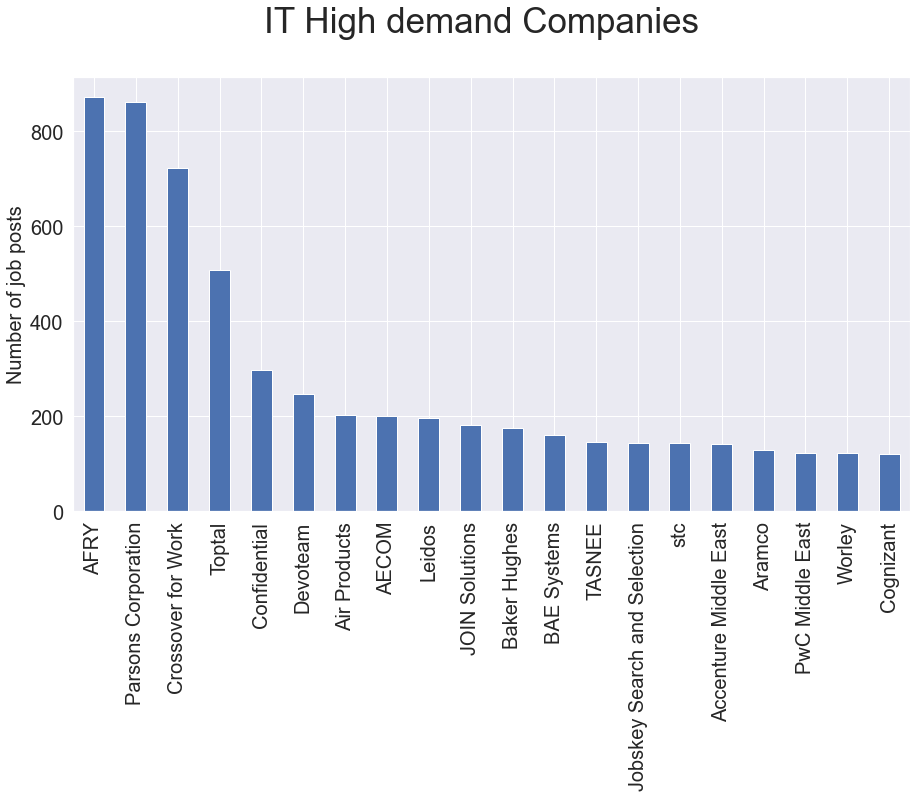

In [164]:
mask['company'].value_counts().head(20).plot(kind='bar', figsize = (15,8), fontsize = 20);

plt.xlabel('', fontsize=20)
plt.ylabel('Number of job posts', fontsize=20, rotation = 'vertical')
plt.title('IT High demand Companies  \n' , fontsize = 35);

## Research Question 4 (what is the Level high required?)

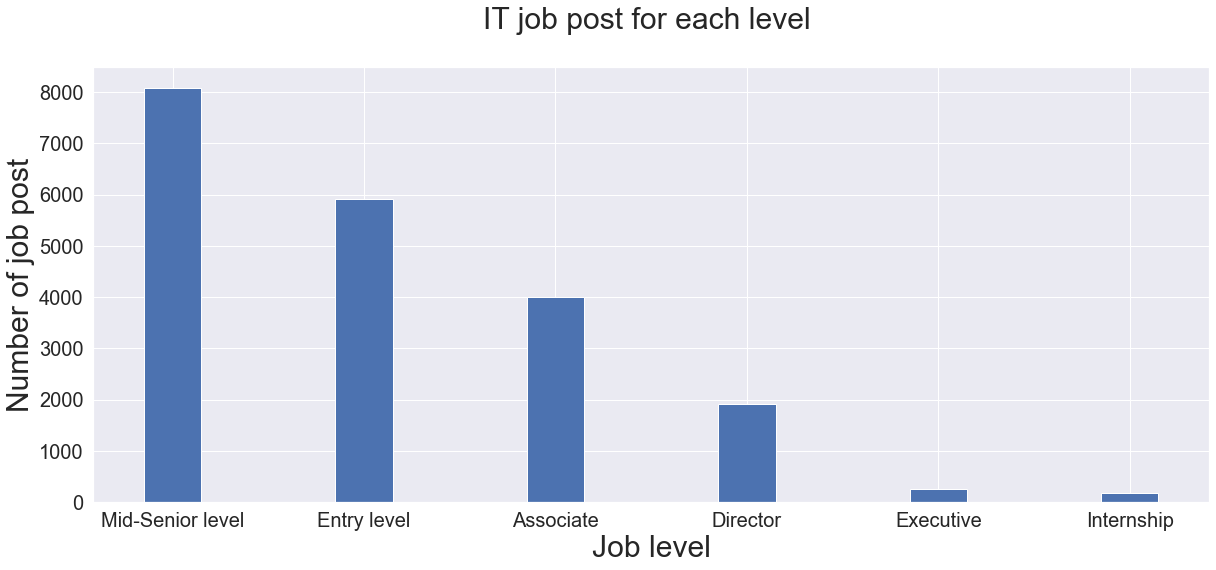

In [168]:
plt.figure(figsize = [20,8])
base_color =sb.color_palette()[0]
data = mask.level.value_counts()
plt.bar(x = data.index,height= data.values ,color=  base_color, width = .3)
plt.tick_params(labelsize = 20)
plt.xlabel('Job level', fontsize=30)
plt.ylabel('Number of job post', fontsize=30, rotation = 'vertical')
plt.title('IT job post for each level \n', fontsize = 30);

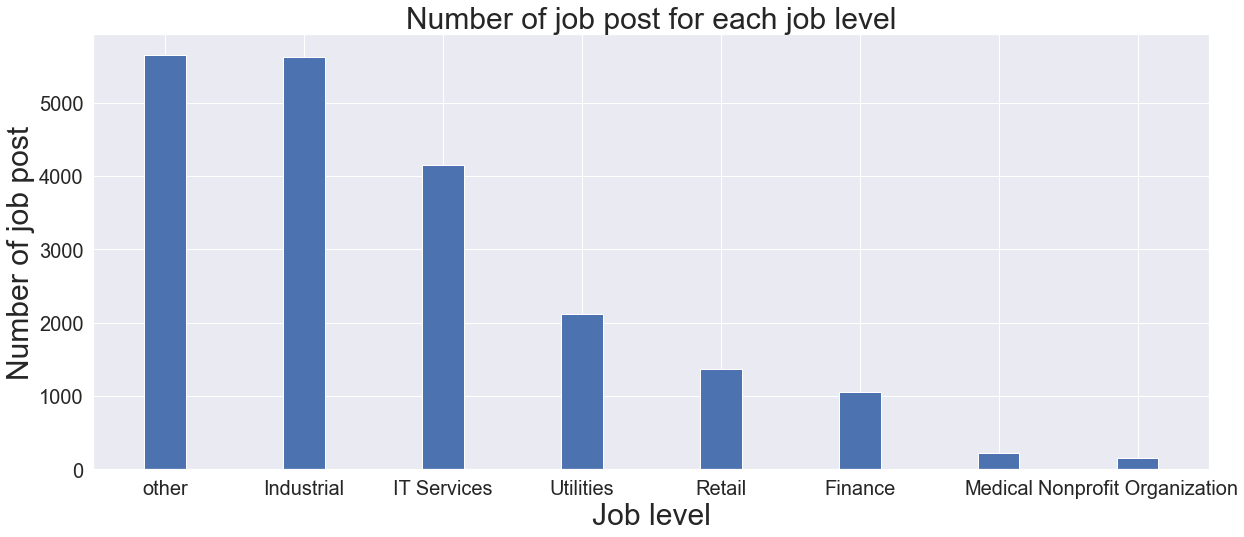

In [166]:
plt.figure(figsize = [20,8])
base_color =sb.color_palette()[0]
data = mask.industry.value_counts()
plt.bar(x = data.index,height= data.values ,color=  base_color, width = .3)
plt.tick_params(labelsize = 20)
plt.xlabel('Job level', fontsize=30)
plt.ylabel('Number of job post', fontsize=30, rotation = 'vertical')
plt.title('Number of job post for each job level', fontsize = 30);

<a id='conclusions'></a>
## Conclusions

> After EDA I notate Labor market has a high demand for IT positions. Also, IT services become a major department in different industries. The mid-senior level is the highest level in demand for different industries, especially in the IT department.